<h1><center>21AIE312 | DEEP LEARNING
    <br><br>
    Pre Trained | Transfer Learning Network</center></h1>

## Task to Perform
#### Use Pre trained model to use transfer learning concepts for CIFAR10 Dataset

In [13]:
# Importing necessary packages

from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense, MaxPooling2D, Conv3D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.applications import EfficientNetB0
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping
from matplotlib import pyplot as pt
from keras.datasets import cifar10
from keras.models import Model
import tensorflow as tf
import numpy as np
import keras

## CIFAR with ANN [ without pretrained model ]

In [12]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data to fit the input shape of the CNN
x_train = x_train.reshape(x_train.shape)
x_test = x_test.reshape(x_test.shape)

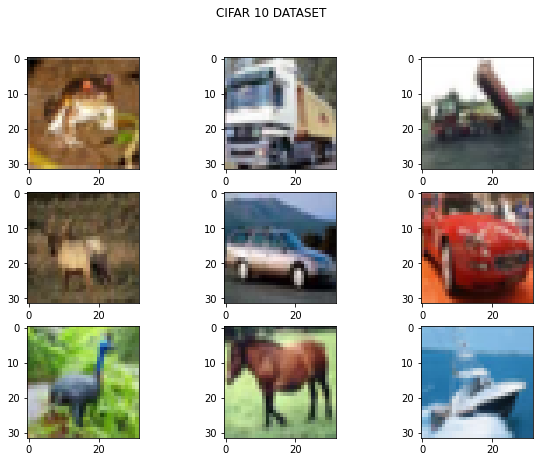

In [20]:
# Visulaizing the Data

pt.subplots(figsize=(10, 7))
pt.suptitle("CIFAR 10 DATASET")
for i in range(9):
    pt.subplot(3, 3, i+1)
    pt.imshow(x_train[i])
pt.show()

In [22]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [23]:
model.compile(optimizer='adam',  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8687 - accuracy: 0.3277 - val_loss: 1.7180 - val_accuracy: 0.3785
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.7005 - accuracy: 0.3904 - val_loss: 1.6152 - val_accuracy: 0.4236
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6395 - accuracy: 0.4142 - val_loss: 1.6114 - val_accuracy: 0.4245
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5960 - accuracy: 0.4276 - val_loss: 1.5796 - val_accuracy: 0.4355
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5672 - accuracy: 0.4397 - val_loss: 1.5520 - val_accuracy: 0.4468
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5410 - accuracy: 0.4484 - val_loss: 1.5987 - val_accuracy: 0.4297
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5199 - accuracy: 0.4550 - val_loss: 1.5169 - val_accuracy:

In [24]:
loss, accuracy = model.evaluate(x_test, y_test)
model_predicted = np.argmax(model.predict(x_test) , axis=1)

313/313 [==============================] - 1s 3ms/step - loss: 1.5038 - accuracy: 0.4639


In [25]:
print('Accuracy of the model :', accuracy)
print('Loss of the model :', loss)

Accuracy of the model : 0.46389999985694885
Loss of the model : 1.5037968158721924


# ResNet50

### Without pretrained

In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Preprocessing the data with ResNet
x_train = preprocess_input(x_train)
x_test = preprocess_input(x_test)

In [6]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=30)

Epoch 1/30
391/391 [==============================] - 3s 6ms/step - loss: 8.9667 - accuracy: 0.1392
Epoch 2/30
391/391 [==============================] - 2s 5ms/step - loss: 2.3126 - accuracy: 0.1094
Epoch 3/30
391/391 [==============================] - 2s 5ms/step - loss: 2.2987 - accuracy: 0.1111
Epoch 4/30
391/391 [==============================] - 3s 8ms/step - loss: 2.2906 - accuracy: 0.1158
Epoch 5/30
391/391 [==============================] - 3s 8ms/step - loss: 2.2934 - accuracy: 0.1195
Epoch 6/30
391/391 [==============================] - 3s 7ms/step - loss: 2.2882 - accuracy: 0.1211
Epoch 7/30
391/391 [==============================] - 4s 9ms/step - loss: 2.2766 - accuracy: 0.1210
Epoch 8/30
391/391 [==============================] - 3s 7ms/step - loss: 2.2645 - accuracy: 0.1300
Epoch 9/30
391/391 [==============================] - 3s 8ms/step - loss: 2.2344 - accuracy: 0.1451
Epoch 10/30
391/391 [==============================] - 3s 8ms/step - loss: 2.2047 - accuracy: 0.1518

In [7]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy of the model :', accuracy)
print('Loss of the model :', loss)

Accuracy of the model : 0.33709999918937683
Loss of the model : 1.7865638732910156


### With Pretrained


In [5]:
resnet = ResNet50(
    include_top=False, 
	weights='imagenet',
    input_shape=(32,32,3),
    pooling='max'
)


x = resnet.output
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=resnet.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train)

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')
model.fit(datagen.flow(x_train, y_train, batch_size=128),
          steps_per_epoch=x_train.shape[0] // 128,
          epochs=15,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping])

Epoch 1/15
390/390 [==============================] - 69s 108ms/step - loss: 1.6655 - accuracy: 0.4555 - val_loss: 1.8499 - val_accuracy: 0.4905
Epoch 2/15
390/390 [==============================] - 39s 101ms/step - loss: 1.0078 - accuracy: 0.6719 - val_loss: 1.3389 - val_accuracy: 0.5448
Epoch 3/15
390/390 [==============================] - 39s 101ms/step - loss: 0.8970 - accuracy: 0.7114 - val_loss: 3.0853 - val_accuracy: 0.7128
Epoch 4/15
390/390 [==============================] - 39s 99ms/step - loss: 0.7934 - accuracy: 0.7468 - val_loss: 0.8597 - val_accuracy: 0.7226
Epoch 5/15
390/390 [==============================] - 39s 99ms/step - loss: 0.7432 - accuracy: 0.7614 - val_loss: 0.7334 - val_accuracy: 0.7574
Epoch 6/15
390/390 [==============================] - 38s 98ms/step - loss: 0.6784 - accuracy: 0.7827 - val_loss: 0.7098 - val_accuracy: 0.7662
Epoch 7/15
390/390 [==============================] - 38s 98ms/step - loss: 0.7030 - accuracy: 0.7751 - val_loss: 0.9084 - val_accura

In [24]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy of the model :', accuracy)
print('Loss of the model :', loss)

Accuracy of the model : 0.6446999907493591
Loss of the model : 1.1708430051803589


## Efficient Net

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

x_train = keras.applications.efficientnet.preprocess_input(x_train)
x_test = keras.applications.efficientnet.preprocess_input(x_test)

efficientnet = EfficientNetB0(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32,3),
    pooling='max'
)

### Without pretrained

In [10]:
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=30)

Epoch 1/30
391/391 [==============================] - 4s 9ms/step - loss: 25.5636 - accuracy: 0.1930A: 0s - loss: 28.6321 - accuracy
Epoch 2/30
391/391 [==============================] - 3s 7ms/step - loss: 6.6945 - accuracy: 0.2096
Epoch 3/30
391/391 [==============================] - 3s 8ms/step - loss: 2.2912 - accuracy: 0.1142
Epoch 4/30
391/391 [==============================] - 2s 5ms/step - loss: 2.2932 - accuracy: 0.1128
Epoch 5/30
391/391 [==============================] - 2s 5ms/step - loss: 2.2970 - accuracy: 0.1068
Epoch 6/30
391/391 [==============================] - 2s 5ms/step - loss: 2.2982 - accuracy: 0.1026
Epoch 7/30
391/391 [==============================] - 2s 5ms/step - loss: 2.2923 - accuracy: 0.1125
Epoch 8/30
391/391 [==============================] - 2s 5ms/step - loss: 2.2950 - accuracy: 0.1087
Epoch 9/30
391/391 [==============================] - 2s 6ms/step - loss: 2.2925 - accuracy: 0.1124
Epoch 10/30
391/391 [==============================] - 2s 5ms/step 

In [12]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy of the model :', accuracy)
print('Loss of the model :', loss)

Accuracy of the model : 0.10000000149011612
Loss of the model : 2.302882671356201


### With Pretrained

In [29]:
x = efficientnet.output
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=efficientnet.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
datagen.fit(x_train)

In [30]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='auto')

model.fit(datagen.flow(x_train, y_train, batch_size=128),
          steps_per_epoch=x_train.shape[0] // 128,
          epochs=10,
          validation_data=(x_test, y_test),
          callbacks=[early_stopping])

Epoch 1/10
390/390 [==============================] - 110s 239ms/step - loss: 1.3588 - accuracy: 0.5491 - val_loss: 0.8122 - val_accuracy: 0.7326
Epoch 2/10
390/390 [==============================] - 75s 191ms/step - loss: 0.8040 - accuracy: 0.7321 - val_loss: 0.6436 - val_accuracy: 0.7807
Epoch 3/10
390/390 [==============================] - 76s 194ms/step - loss: 0.6769 - accuracy: 0.7750 - val_loss: 0.6045 - val_accuracy: 0.7980
Epoch 4/10
390/390 [==============================] - 74s 189ms/step - loss: 0.5899 - accuracy: 0.8020 - val_loss: 0.5601 - val_accuracy: 0.8150
Epoch 5/10
390/390 [==============================] - 73s 186ms/step - loss: 0.5502 - accuracy: 0.8182 - val_loss: 0.5264 - val_accuracy: 0.8220
Epoch 6/10
390/390 [==============================] - 85s 219ms/step - loss: 0.5126 - accuracy: 0.8287 - val_loss: 0.4981 - val_accuracy: 0.8339
Epoch 7/10
390/390 [==============================] - 82s 210ms/step - loss: 0.4875 - accuracy: 0.8372 - val_loss: 0.5155 - val_a

In [31]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Accuracy of the model :', accuracy)
print('Loss of the model :', loss)

Accuracy of the model : 0.8467000126838684
Loss of the model : 0.4654778838157654
